In [17]:
#import xgboost as xgb
import pandas as pd #pandas stands for panel data
import numpy as np
import math as ma
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import linregress

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_orig_train = df_train.copy()
df_orig_test = df_test.copy()

all_df_list = [df_train,df_test]

#for later on
#scores = -1 * cross_val_score(my_pipeline, X, y,
#                              cv=5,
#                              scoring='neg_mean_absolute_error')

def makeDict(df,label):
    strcat_dict = {}
    for i,row in df.iterrows():
        strcat_dict[row[label]] = i 
    return strcat_dict

def makeOrdinal(df,label,showDict):
    filtered = df.sort_values([label], ascending = [True])
    df_filtered = filtered.groupby(label).first().reset_index()
    strcat_dict = {}
    
    for i,row in df_filtered.iterrows():
        strcat_dict[row[label]] = i 
    
    if showDict:
        print(strcat_dict)
    
    for j,row in df.iterrows():
        df.at[j,label] = strcat_dict.get(row[label])
    
    return df

In [2]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice') #unsure...
quantitative.remove('Id') #tells us nothing
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

#had the same idea
categorical_cols = ["MSZoning","Street","Alley","LotShape","LandContour","LotConfig",\
                    "LandSlope","Neighborhood","Condition1","Condition2","BldgType",\
                    "HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd",\
                    "MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual",\
                    "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",\
                    "Heating","HeatingQC","CentralAir","Electrical","KitchenQual",\
                    "Functional","FireplaceQu","GarageType","GarageFinish",\
                    "GarageQual","GarageCond","PavedDrive","Fence",\
                    "MiscFeature","SaleType","SaleCondition"]

for column in categorical_cols:
    for df_single in all_df_list:
        makeOrdinal(df_single,column,True)

#drop columns that are too sparse to be of any statistical significance
#print("Before", df_train.shape, df_test.shape, all_df_list[0].shape, all_df_list[1].shape)

#df_train = df_train.drop(['Utilities','PoolArea','PoolQC'], axis=1)
#df_test = df_test.drop(['Utilities','PoolArea','PoolQC'], axis=1)
#all_df_list = [df_train,df_test]

#print("After", df_train.shape, df_test.shape, all_df_list[0].shape, all_df_list[1].shape)
df_train.head(150)

{'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}
{'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}
{'Grvl': 0, 'Pave': 1}
{'Grvl': 0, 'Pave': 1}
{'Grvl': 0, 'Pave': 1}
{'Grvl': 0, 'Pave': 1}
{'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}
{'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}
{'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}
{'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}
{'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}
{'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}
{'Gtl': 0, 'Mod': 1, 'Sev': 2}
{'Gtl': 0, 'Mod': 1, 'Sev': 2}
{'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}
{'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Ed

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,None,3,3,AllPub,...,0,NaN,None,None,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,None,3,3,AllPub,...,0,NaN,None,None,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,None,0,3,AllPub,...,0,NaN,None,None,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,None,0,3,AllPub,...,0,NaN,None,None,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,None,0,3,AllPub,...,0,NaN,None,None,0,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,None,0,3,AllPub,...,0,NaN,2,2,700,10,2009,8,4,143000
6,7,20,3,75.0,10084,1,None,3,3,AllPub,...,0,NaN,None,None,0,8,2007,8,4,307000
7,8,60,3,NaN,10382,1,None,0,3,AllPub,...,0,NaN,None,2,350,11,2009,8,4,200000
8,9,50,4,51.0,6120,1,None,3,3,AllPub,...,0,NaN,None,None,0,4,2008,8,0,129900
9,10,190,3,50.0,7420,1,None,3,3,AllPub,...,0,NaN,None,None,0,1,2008,8,4,118000


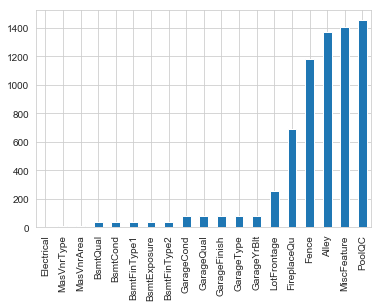

In [3]:
#quick way to see what data is missing 
#remember I dropped the pool stuff and utilities earlier as they had no variation

sns.set_style("whitegrid")
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

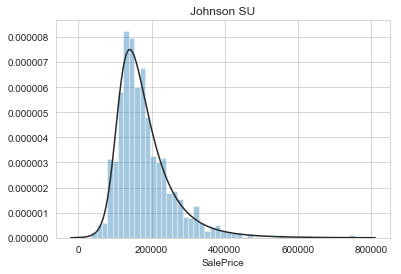

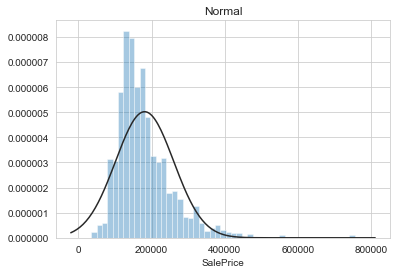

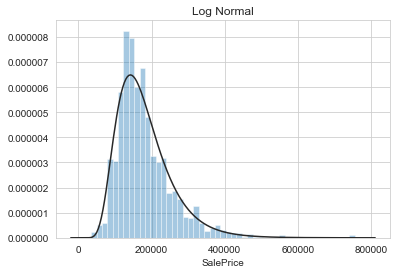

In [4]:
y = df_train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [5]:
#the above plots show that the sale price is not normally distributed, so needs to be normalised
#they show also that the johnson SU distribution works best for this

#Also, now test the quantitative values to see if they are normally distributed
#stats.shapiro is a hypothesis test for the normal distribution, outputs a pair of variables
#the second variable [1], in the list, is the p-value...so a hypothesis test at the 5% sig level (original at 1%)
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.05
normal = pd.DataFrame(df_train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())
#so none of the quantitiative variables are normally distrubted at a 1% significance level

False


In [6]:
#Spearman correlation is better to work with in this case because 
#it picks up relationships between variables even when they are nonlinear

"""I think the broad idea with this encode function is the same as makeOrdinal()"""
#create an empty df, 
#unique() then returns a numpy array of the unique values in the feature we're currently on
#make the index the actual sale price values (and discard the traditional 0,1,2,3,4 style deafult index)
#create another field on the df group them by the mean sale price
#sort the values
#create a new field called ordering, with a range to be the length of the df
#then convert the new field to a dictionary 
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    print(ordering)
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(df_train, q)
    qual_encoded.append(q+'_E')

#qual_encoded is just a list of qualatative variables, now we have
#df and qual encoded ready to perform spearman correlation
print(qual_encoded)

{0: 1, 4: 2, 2: 3, 3: 4, 1: 5}
{0: 1, 1: 2}
{0: 1, 1: 2, None: 3}
{3: 1, 0: 2, 2: 3, 1: 4}
{0: 1, 3: 2, 2: 3, 1: 4}
{'NoSeWa': 1, 'AllPub': 2}
{4: 1, 2: 2, 0: 3, 3: 4, 1: 5}
{0: 1, 1: 2, 2: 3}
{10: 1, 9: 2, 2: 3, 3: 4, 7: 5, 17: 6, 19: 7, 1: 8, 18: 9, 13: 10, 12: 11, 11: 12, 20: 13, 14: 14, 8: 15, 0: 16, 5: 17, 6: 18, 4: 19, 21: 20, 24: 21, 23: 22, 22: 23, 16: 24, 15: 25}
{0: 1, 5: 2, 1: 3, 6: 4, 2: 5, 7: 6, 8: 7, 4: 8, 3: 9}
{7: 1, 0: 2, 1: 3, 6: 4, 2: 5, 5: 6, 4: 7, 3: 8}
{1: 1, 2: 2, 3: 3, 4: 4, 0: 5}
{1: 1, 6: 2, 0: 3, 4: 4, 7: 5, 2: 6, 5: 7, 3: 8}
{2: 1, 1: 2, 4: 3, 0: 4, 3: 5, 5: 6}
{4: 1, 0: 2, 1: 3, 3: 4, 5: 5, 6: 6, 2: 7, 7: 8}
{2: 1, 1: 2, 4: 3, 0: 4, 8: 5, 13: 6, 14: 7, 11: 8, 6: 9, 9: 10, 3: 11, 12: 12, 5: 13, 10: 14, 7: 15}
{4: 1, 0: 2, 2: 3, 1: 4, 14: 5, 8: 6, 12: 7, 11: 8, 15: 9, 6: 10, 10: 11, 3: 12, 13: 13, 5: 14, 7: 15, 9: 16}
{0: 1, 2: 2, 1: 3, 3: 4, None: 5}
{1: 1, 3: 2, 2: 3, 0: 4}
{3: 1, 1: 2, 2: 3, 4: 4, 0: 5}
{3: 1, 0: 2, 1: 3, 4: 4, 5: 5, 2: 6}
{1: 1, 3: 2, 2: 

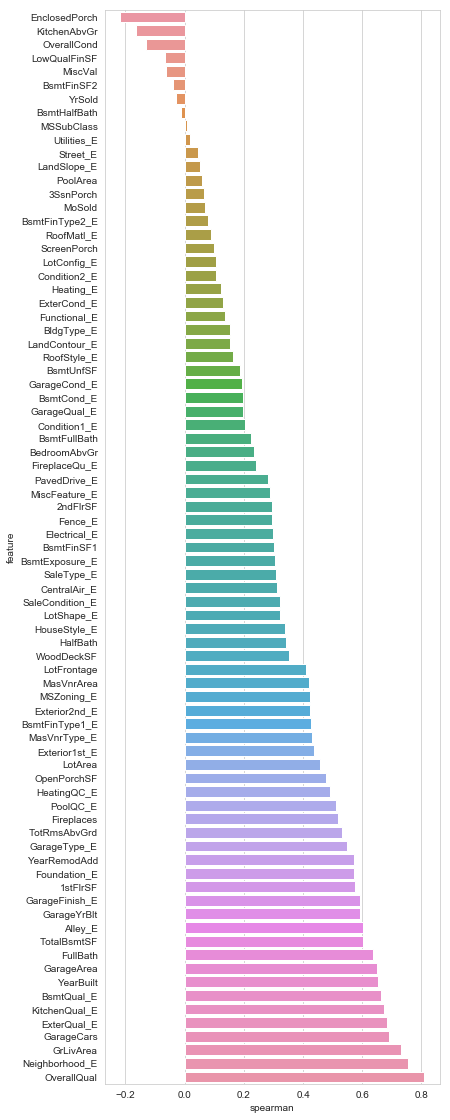

In [7]:
#create a new dataframe
#set a feature column with all the features
#set a spearman column which calculates the spearman for each feature passed in
#sort the results
#plot the results, then use seaborn to display it
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(df_train,features)

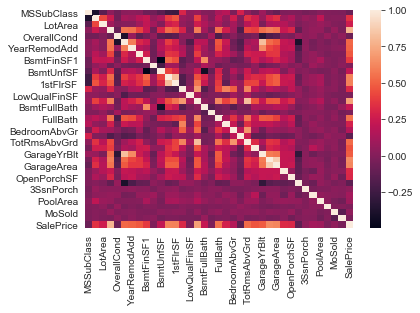

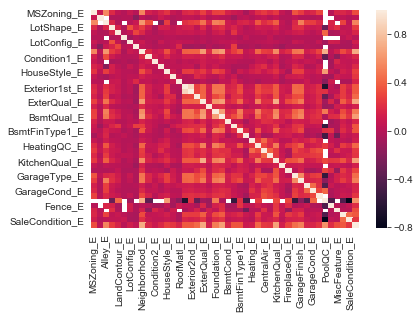

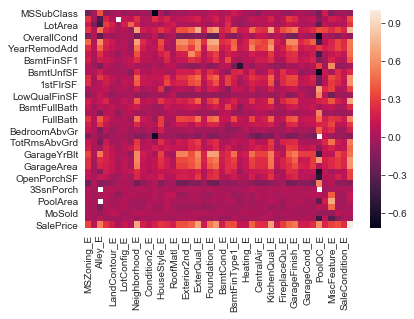

In [8]:
#declare a plot, then create the correlation, then pass it into seaborn
plt.figure(1)
corr = df_train[quantitative+['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = df_train[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)

#this final correlation is the quantitative 'against' the qualitatitive encoded
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]),\
                    index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = df_train[q1].corr(df_train[q2])
sns.heatmap(corr)

0.7548210534731564


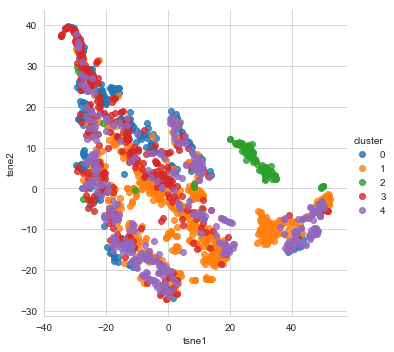

In [9]:
#TSNE t-distributed stochastic neighbour embedding
#in very loose terms, a means of feature reduction to view the data on a graph
#also makes use of PCA (principal component analysis)

features = quantitative + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = df_train[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

In [10]:
#Analysis only
#only select the int or float columns
int_cols = [cname for cname in df_train.columns if df_train[cname].dtype in ['int64']]
float_cols = [cname for cname in df_train.columns if df_train[cname].dtype in ['float64']]

sale_values = df_train['SalePrice']
primary_correlations = []
for val in int_cols:
    int_regression = linregress(df_train[val],sale_values)
    primary_correlations.append((val,[int_regression.rvalue,\
                                      int_regression.pvalue]))
    #print(linregress(df_train[val],sale_values))

df_float_cor = df_train.copy()

for i,row in df_float_cor[float_cols].iterrows():
    if ma.isnan(row['LotFrontage']):
        df_float_cor.at[i,'LotFrontage'] = 0 #nan means no frontage, so 0 is sensible
    if ma.isnan(row['MasVnrArea']):
        df_float_cor.at[i,'MasVnrArea'] = 0 #nan means no area, so 0 is sensible
    if ma.isnan(row['GarageYrBlt']):
        df_float_cor.at[i,'GarageYrBlt'] = df_train['GarageYrBlt'].mean() #nan means unknown, so use the mean

for val in float_cols:
    float_regression = linregress(df_float_cor[val],sale_values)
    primary_correlations.append((val,[float_regression.rvalue,\
                                      float_regression.pvalue]))
        
print("number of numeric columns:",len(primary_correlations))
correldf = pd.DataFrame(primary_correlations, columns=["column name","r value,p value"])
correldf.sort_values(by='r value,p value',ascending=True)

#5 to 10 are possibly not significantly correlated, but they are not correlated anyway
#all these others are infinitesmally small numbers, so the correlations are signifincant

number of numeric columns: 81


,column name,"r value,p value"
0,Id,"[-0.021916719443431106, 0.4026937997557728]"
43,Utilities_E,"[0.014314296147248785, 0.584716773968909]"
45,LandSlope_E,"[0.05115224817946654, 0.05068585382770573]"
48,Condition2_E,"[0.09369253858307168, 0.00033732572813098874]"
44,LotConfig_E,"[0.12288236313235516, 2.4873477967256472e-06]"
57,ExterCond_E,"[0.13802572133110846, 1.1914725108834585e-07]"
42,LandContour_E,"[0.15843700454076032, 1.1492358792610133e-09]"
47,Condition1_E,"[0.17239779066121794, 3.325673904768853e-11]"
49,BldgType_E,"[0.17602476324209007, 1.2606329896238096e-11]"
55,MasVnrType_E,"[nan, nan]"


In [18]:
# Imputation
y = df_orig_train['SalePrice']
sale_predictors = df_orig_train.drop(['SalePrice'], axis=1)
X = sale_predictors.select_dtypes(exclude=['object'])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

my_imputer = SimpleImputer(strategy='mean')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

#data has been split into variables, which is why there is now only 1168 rows
print(np.shape(imputed_X_train))

(1168, 37)


          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0      619.0        20.0    90.000000  11694.0          9.0          5.0   
1      871.0        20.0    60.000000   6600.0          5.0          5.0   
2       93.0        30.0    80.000000  13360.0          5.0          7.0   
3      818.0        20.0    69.614017  13265.0          8.0          5.0   
4      303.0        20.0   118.000000  13704.0          7.0          5.0   
5     1455.0        20.0    62.000000   7500.0          7.0          5.0   
6       41.0        20.0    84.000000   8658.0          6.0          5.0   
7      960.0       160.0    24.000000   2572.0          7.0          5.0   
8       76.0       180.0    21.000000   1596.0          4.0          5.0   
9     1390.0        50.0    60.000000   6000.0          6.0          6.0   
10    1255.0        60.0    60.000000   6931.0          7.0          5.0   
11     690.0       120.0    61.000000   7577.0          6.0          5.0   
12     649.0

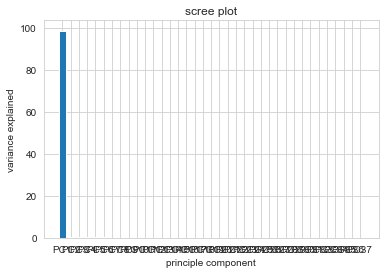

In [20]:
pca = PCA()
pca_fin = pca.fit(imputed_X_train)
print(imputed_X_train)
#pca_fin = pca.transform(imputed_X_train)
print(pca_fin.explained_variance_ratio_)
per_var = np.round(pca.explained_variance_ratio_ * 100,decimals=1)
labelsp = ['PC' + str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labelsp)
plt.xlabel("principle component")
plt.ylabel("variance explained")
plt.title("scree plot")
plt.show()

#this plot shows that only approximately 36% of the variation is accounted for in this PCA
#the usual threshold might be 95% if we were being strict, but a minimum of 60% for it to be useable